## Imports

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from utils import rgb2gray
from hog import hog
from SVM import OVO_test, OVO_train

In [2]:
Xtr = pd.read_csv('data/Xtr.csv',header=None,sep=',',usecols=range(3072))
Xte = pd.read_csv('data/Xte.csv',header=None,sep=',',usecols=range(3072))
Ytr_ = pd.read_csv('data/Ytr.csv')#, index_col = None, header = None)

## Data preprocessing

In [3]:
Xtr = np.array(Xtr).reshape(5000, 3,32, 32).swapaxes(1,2).swapaxes(2,3)
Xte = np.array(Xte).reshape(2000, 3,32, 32).swapaxes(1,2).swapaxes(2,3)
Ytr = np.array(Ytr_['Prediction'])

Xtr_ = rgb2gray(Xtr)
Xte_ = rgb2gray(Xte)

## Hog processing

In [5]:
Xtr_hog = np.array([hog(image) for image in Xtr_[:1]])
Xte_hog = np.array([hog(image) for image in Xte_[:1]])

In [19]:
from skimage.transform import resize

In [20]:
image = resize(Xtr_[0], (128*4, 64*4))

In [21]:
image.shape

(512, 256)

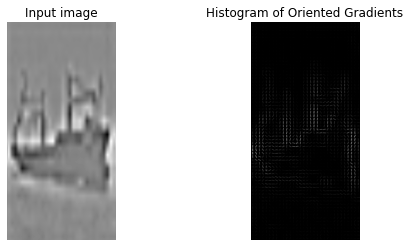

In [22]:
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, exposure


#image = Xtr_[0]

fd, hog_image = hog(image, visualize=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [18]:
fd.shape

(0,)

## Sklearn

## SVM

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [6]:
#X_train, X_test, y_train, y_test = train_test_split(Xtr_hog, Ytr, test_size=0.33, random_state=42)

In [7]:
#dic = OVO_train(X_train, y_train, 1.5,100)
dic = OVO_train(Xtr_hog, Ytr, Xtr_hog.shape[1]*Xtr_hog.var(), 1)

value of i: 0
value of j: 1
value of j: 2
value of j: 3
value of j: 4
value of j: 5
value of j: 6
value of j: 7
value of j: 8
value of j: 9
value of i: 1
value of j: 2
value of j: 3
value of j: 4
value of j: 5
value of j: 6
value of j: 7
value of j: 8
value of j: 9
value of i: 2
value of j: 3
value of j: 4
value of j: 5
value of j: 6
value of j: 7
value of j: 8
value of j: 9
value of i: 3
value of j: 4
value of j: 5
value of j: 6
value of j: 7
value of j: 8
value of j: 9
value of i: 4
value of j: 5
value of j: 6
value of j: 7
value of j: 8
value of j: 9
value of i: 5
value of j: 6
value of j: 7
value of j: 8
value of j: 9
value of i: 6
value of j: 7
value of j: 8
value of j: 9
value of i: 7
value of j: 8
value of j: 9
value of i: 8
value of j: 9


In [8]:
#pred = OVO_test(X_test, dic)
#accuracy_score(pred, y_test)

## Export

In [9]:
pred_report = OVO_test(Xte_hog, dic)
aux = pd.DataFrame(pred_report).reset_index()
aux['index']+=1
aux.rename(columns={'index':'Id', 0:"Prediction"}, inplace=True)
pd.DataFrame(aux).to_csv("pred", index=False)

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
